# Benford's Law in Stock Returns

### "Financial data is definitely not uniform. A lot of financial data conforms to Benford's law, which says that in some types of real-world data, the lead digits are not equally likely." - Chapter 12, Humble Pi

While reading Matt Parker's book "Humble Pi" in Chapter 12, I came across Parker's mention of how financial data are not uniform, and many of them follow Benford's Law. This got me curious, so I decided to check if this is true by looking at data about stock returns.

## Benford's Law

Benford's Law is an observation where in many naturally occurring datasets, the first digit of numbers is more likely to be small (1, 2, 3, etc.) rather than large (9). Benford's Law is utilized in various fields, including accounting fraud detection, the analysis of election data, the detection of scientific fraud, and the examination of macroeconomic data.

## Stock Returns Data

I retrieved price data for the S&P 500 index from Yahoo! Finance, spanning from the beginning of the year 2000 up to the present day. Then I calculated the daily logarithmic returns. Logarithmic returns offer a more accurate measure of the percentage change in the stock market over a period of time. I got rid of rows with zero(3) and missing(1) returns. Then I multiplied entire logarithmic returns data by 1,000,000 to resize the lowest return value. Because some returns are negative, I calculated absolute values of the returns and then extracted the lead digits for each absolute values and stored in a new column. 

In [21]:
import datetime as dt
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Set the start and end dates
start_date = "2000-01-01"
end_date = dt.datetime.now()

# Fetch S&P 500 data from Yahoo Finance
snp500_data = yf.download('^GSPC', start=start_date, end=end_date)

# Calculate daily log returns
snp500_data['Log_Returns'] = np.log(snp500_data['Adj Close'] / snp500_data['Adj Close'].shift(1))

# Drop the zero returns 
snp500_data.drop(snp500_data[snp500_data['Log_Returns'] == 0].index, inplace=True)

# Drop rows with missing values (NaN)
snp500_data.dropna(inplace=True)

# Scale log_returns by 1,000,000
snp500_data['S_Log_Returns'] = snp500_data['Log_Returns'] * 1000000

# Calculate absolute log returns and add them as a new column
snp500_data['Abs_Log_Returns'] = np.abs(snp500_data['S_Log_Returns'])

# Drop the zero returns 
snp500_data.drop(snp500_data[snp500_data['Abs_Log_Returns'] == 0].index, inplace=True)

# Sort the DataFrame by absolute log returns in ascending order
snp500_data.sort_values(by='Abs_Log_Returns', ascending=True, inplace=True)

# Save the lead digits in a new column
snp500_data['lead_digit'] = snp500_data['Abs_Log_Returns'].astype(str).str[0]

snp500_data.head(12)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Log_Returns,S_Log_Returns,Abs_Log_Returns,lead_digit
Date,,,,,,,,,,
2014-10-02,1945.829956,1952.319946,1926.030029,1946.170044,1946.170044,4012510000,0.000005,5.143328,5.143328,5
2013-04-24,1578.780029,1583.000000,1575.800049,1578.790039,1578.790039,3598240000,0.000006,6.340170,6.340170,6
2013-01-24,1494.810059,1502.270020,1489.459961,1494.819946,1494.819946,3699430000,0.000007,6.614662,6.614662,6
2018-09-28,2910.030029,2920.530029,2907.500000,2913.979980,2913.979980,3461680000,-0.000007,-6.870144,6.870144,6
2006-10-31,1377.930054,1381.209961,1372.189941,1377.939941,1377.939941,2803030000,0.000007,7.175734,7.175734,7
2006-06-20,1240.119995,1249.010010,1238.869995,1240.119995,1240.119995,2232950000,-0.000008,-8.071578,8.071578,8
2005-04-11,1181.199951,1184.069946,1178.689941,1181.209961,1181.209961,1525310000,0.000008,8.474199,8.474199,8
2001-10-31,1059.790039,1074.790039,1057.550049,1059.780029,1059.780029,1352500000,-0.000009,-9.445091,9.445091,9
2002-06-04,1040.680054,1046.060059,1030.520020,1040.689941,1040.689941,1466600000,0.000010,9.501141,9.501141,9


## Benford Percentages

The next step was to calculate and compare the frequency of each lead digit, in percentage, with the benford percentages. Benford's percentages are as follows: 30.1%, 17.6%, 12.5%, 9.7%, 7.9%, 6.7%, 5.8%, 5.1%, and 4.6%, each corresponding to the first digits 1 through 9, respectively.

In [12]:
# Count the frequency of each digit
digit_counts = snp500_data['lead_digit'].value_counts().sort_index()

# Calculate the total count
total_count = digit_counts.sum()

# Calculate the percentage of each digit
digit_percentages = (digit_counts / total_count) * 100

# Benford's Law expectations (percentage of each first digit)
benford_percentages = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]

## Plot: Observed vs. Benford's Law

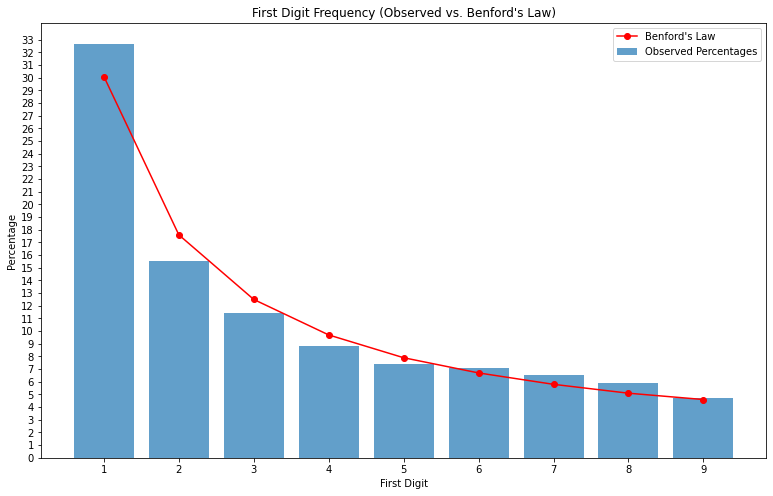

In [22]:
# Create a bar plot for the observed percentages and add Benford's Law line
plt.figure(figsize=(13, 8))
plt.bar(digit_percentages.index, digit_percentages.values, label='Observed Percentages', alpha=0.7)
plt.plot(range(9), benford_percentages, color='red', marker='o', linestyle='-', label="Benford's Law")
plt.title('First Digit Frequency (Observed vs. Benford\'s Law)')
plt.xlabel('First Digit')
plt.ylabel('Percentage')
plt.yticks(np.arange(0, max(digit_percentages.values) + 1, 1))
plt.legend()
plt.show()

After plotting a graph for Observed vs. Benford's Law, it was noticed that the frequency of lead digits of scaled absolute returns for S&P 500 index somewhat mimics Benford's Law, with the data following a similar pattern as in Benford's Law.

### Reference

- [Benford's Law](https://en.wikipedia.org/wiki/Benford%27s_law)
- [What Are Logarithmic Returns](https://saturncloud.io/blog/what-are-logarithmic-returns-and-how-to-calculate-them-in-pandas-dataframe/#:~:text=Logarithmic%20returns%20are%20important%20in,over%20a%20period%20of%20time.)
    